## Exploratory Data Analysis on the Most Streamed Spotify Songs of 2023 by Bon-ao, Angelo B.

#### This code entails an exploratory data analysis on the most streamed spotify songs of 2023. 
#### It includes exploring, cleaning, and visualizing the data it contains.

---

### Preparation/Pre-processing for EDA

#### Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

##### These libraries are needed in order to perform EDA on the given dataset;
##### The pandas library will make it so that the dataset from the csv file is read and turned into a dataframe.
##### It'll also allow us to use commands that is needed for the EDA.
#####
##### The matplotlib.pyplot library will allow us to visualize the data and highlight the stories within the data.
##### 
##### The seaborn library serves the same purpose as matplotlib.pyplot but carries an extra feature that colors the visualizations.
---

#### Loading/Reading the data as a dataframe

In [9]:
df_spotify = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


##### To load the given dataset, which is a csv file, the pd.read_csv is used
##### The encoding='ISO-8859-1' is also implemented as it would not load the file without it
#####
##### It would also seem that multiple artists are credited for a number of songs so they must be seperated and each have their own row
---

#### Viewing/Checking the data

In [12]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

##### Using .info() acquires the basic information of the data
##### There are 953 rows and 24 columns. 
##### The datatype for the streams in_deezer_playlists, and in_shazam_charts attributes are also incorrectly detected as an object
---

### Cleaning/Fixing the dataset

#### Fixing the datatypes for streams, in_deezer_playlists, and in_shazam_charts

##### For the streams attribute

In [17]:
df_spotify['streams'].iloc[574]

'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [18]:
df_spotify['streams'] = pd.to_numeric(df_spotify['streams'], errors = 'coerce')
df_spotify['streams']

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
948     91473363.0
949    121871870.0
950     73513683.0
951    133895612.0
952     96007391.0
Name: streams, Length: 953, dtype: float64

In [19]:
df_spotify['streams'].iloc[574]

nan

##### Used errors = 'coerce' as without it, it wouldn't be able to convert the 574th row in to a numerical value
##### The value of the 574th row of streams is converted to Nan and is now missing
##### It used to store the values of the other columns related to the row of the song which was 'Love Grows (Where My Rosemary Goes)' by Edison Lighthouse
##### It used to have 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'
#####
##### Upon researching, the original song has about 276,093,748	accumulated streams and is being streamed daily by 168,328 on 2024/10/16 which was 290 days since 2023
##### Subtracting 276,093,748 by 168,000 multiplied by 290 to account for the extra days, we get 227,373,748 streams
##### We should now store this value in that row as done below,

In [21]:
df_spotify.at[574, 'streams'] = 227373748
df_spotify['streams'].iloc[574]

227373748.0

#### For the in_deezer_playlists attribute

In [23]:
df_spotify['in_deezer_playlists'] = df_spotify['in_deezer_playlists'].str.replace(",","").astype(float)
df_spotify['in_deezer_playlists']

0       45.0
1       58.0
2       91.0
3      125.0
4       87.0
       ...  
948     37.0
949      8.0
950      7.0
951     17.0
952     32.0
Name: in_deezer_playlists, Length: 953, dtype: float64

##### The in_deezer_playlists contains numbers with commas and it is the reason it detected as an object
##### replacing all the commas with a space using .str.replace(","") ensuring that it can be all converted into numerical values
##### The astype(float) is used to convert all the values in to column to become the float datatype
#####

#### For the in_shazam_charts attribute

##### It has the same problem with the 'in_deezer_playlists' column so we just need to repeat the process before

In [27]:
df_spotify['in_shazam_charts'] = df_spotify['in_shazam_charts'].str.replace(",","").astype(float)
df_spotify['in_shazam_charts']

0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      0.0
Name: in_shazam_charts, Length: 953, dtype: float64

---
#### Handling duplicate tracks & values

##### To check for duplicates the .duplicated command is used and since there are no exact duplicate of rows, only track names and artists,
##### the .duplicated command has an added condition as (['track_name','artist(s)_name'])]
#####

In [30]:
duplicate_tracks = df_spotify[df_spotify.duplicated(['track_name','artist(s)_name'])]

print("The duplicate tracks that is in the dataseet are ")
print()
print(duplicate_tracks)

The duplicate tracks that is in the dataseet are 

           track_name artist(s)_name  artist_count  released_year  \
482  SPIT IN MY FACE!       ThxSoMch             1           2022   
616    Take My Breath     The Weeknd             1           2021   
764   About Damn Time          Lizzo             1           2022   
873              SNAP      Rosa Linn             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
482              10            31                   573                  0   
616               8             6                  6392                  0   
764               4            14                  9021                  0   
873               3            19                  1818                  0   

         streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
482  301869854.0                   1  ...  166   C#  Major              70   
616  432702334.0                 174  ...  121   G#  Maj

#####
##### The duplicated tracks are probably due to re-releases and source data anomalies such as data entry errors or data collection methods
##### Since the duplicated tracks are only 4, these tracks should be dropped and the their first instance should be kept
#####

In [32]:
df_spotify = df_spotify.drop_duplicates(["track_name","artist(s)_name"])
duplicate_tracks = df_spotify[df_spotify.duplicated(["track_name","artist(s)_name"])]
print(duplicate_tracks)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

[0 rows x 24 columns]


---
#### Handling Missing Values

##### To check for missing values, .isna() returns a bool value, it returns true if the value in a specific attribute is missing or null
##### .sum() makes it so that it counts all the times the isna() returns true
##### To see the specific attributes that have missing values, the missing_values>0 condition is used so it only prints those who have missing values

In [35]:
missing_values = df_spotify.isna().sum()

print("The attributes that have missing values in the dataset are ")
print()
print(missing_values[missing_values>0])

The attributes that have missing values in the dataset are 

in_shazam_charts    50
key                 94
dtype: int64


##### Since the missing values are lesser than 10% of the population, we may use imputation methods to replace them.
##### Except for the cases of the missing values of the key column as they are specific to their own song, an object datatype, and almost has 10% missing
##### We will drop the rows with missing key values
##### 
##### Upon further research, it would seem that most data analysis algorithms/software assumes that data are missing completely at random.
##### For the missing values in the in_shazam_charts, I opted to use the median imputation method 
##### as it makes the assumption that the data is missing completely at random

In [37]:
df_spotify.dropna(subset=['key'], inplace=True)

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3622115646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify.dropna(subset=['key'], inplace=True)


In [38]:
missing_values = df_spotify.isna().sum()
print("The updated missing values are now ")
print()
print(missing_values[missing_values>0])

The updated missing values are now 

in_shazam_charts    41
dtype: int64


##### Now that the rows with missing key values are gone, the missing values for in_shazam_charts have also lessened
##### Making the median imputation safer to execute as it will have less impact to the entire population while retaining the song's other factors

In [40]:
shazam_median = df_spotify['in_shazam_charts'].median()
f"The median value of the 'in_shazam_charts' is {shazam_median}"

"The median value of the 'in_shazam_charts' is 2.5"

In [41]:
df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3851771827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_spotify['in_shazam_charts'].fillna(shazam_median, inplace=True)
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3851771827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify['in_shazam_charts'].filln

##### .fillna() is used to fill all nan values with something else such as the shazam_median,
##### and inplace=True makes it so that the action is done to the original dataframe and not in a seperate copy
##### Lastly, we should reset the index as many rows were dropped from the original dataframe

In [43]:
df_spotify = df_spotify.reset_index(drop=True)

In [44]:
df_spotify.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [45]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            855 non-null    object 
 1   artist(s)_name        855 non-null    object 
 2   artist_count          855 non-null    int64  
 3   released_year         855 non-null    int64  
 4   released_month        855 non-null    int64  
 5   released_day          855 non-null    int64  
 6   in_spotify_playlists  855 non-null    int64  
 7   in_spotify_charts     855 non-null    int64  
 8   streams               855 non-null    float64
 9   in_apple_playlists    855 non-null    int64  
 10  in_apple_charts       855 non-null    int64  
 11  in_deezer_playlists   855 non-null    float64
 12  in_deezer_charts      855 non-null    int64  
 13  in_shazam_charts      855 non-null    float64
 14  bpm                   855 non-null    int64  
 15  key                   8

---
### Overview of Dataset

##### At first, the dataset had about 953 rows and 24 columns. After pre-processing/preparation of the data, 
##### it resulted in the final size of 1324 rows and the same number of columns
#####
##### The datatypes of each column turned out to be either a 64bit integer or an object but some categories were incorrectly labeled as an object
##### Such as the streams, in_deezer_playlists, and in_shazam_charts. After pre-processing/preparation of the data,
##### The three became all 64-bit float datatype
#####
##### At first, after handling all the duplicate tracks
##### there were missing values in the streams column, in_shazam_charts, key columns
##### The missing value in the streams column got replaced by a rough estimate
##### All the rows that has a missing key were dropped
##### Lastly, the rest of missing values in the in_shazam_charts got replaced by the median of the column
---

### Basic Descriptive Statistics

In [49]:
f"The total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].sum()}"

'The total streams of the most streamed spotify songs of 2023 is 438714448369.0'

In [50]:
f"The mean of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].mean()}"

'The mean of the total streams of the most streamed spotify songs of 2023 is 513116313.88187134'

In [51]:
f"The median of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].median()}"

'The median of the total streams of the most streamed spotify songs of 2023 is 284785823.0'

In [52]:
f"The standard deviation of the total streams of the most streamed spotify songs of 2023 is {df_spotify['streams'].std()}"

'The standard deviation of the total streams of the most streamed spotify songs of 2023 is 572140128.9326662'

##### The mean being way higher than the median indicates that the songs with greater streams dominate the calculations of the mean and
##### it also probably increased due to splitting of track rows that are credited to multiple artists
##### 
##### The high standard deviation also supports this theory as it indicates high variance of the number of streams among the tracks
##### Let us check the 10 highest streamed song on Spotify 2023 by ordering the dataset starting from the greatest to least streams 
##### and the distribution of the number of streams for easier analysis

In [54]:
df_spotify[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
# ascending=False sorts the tracks by greatest to least number of streams, gets the top ten by .head(10),
# and only prints the title and its number of streams

,track_name,streams
49,Blinding Lights,3.703895e+09
159,Shape of You,3.562544e+09
78,Someone You Loved,2.887242e+09
553,Dance Monkey,2.864792e+09
37,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
145,One Dance,2.713922e+09
76,STAY (with Justin Bieber),2.665344e+09
128,Believer,2.594040e+09
649,Closer,2.591224e+09
42,Starboy,2.565530e+09


Text(0, 0.5, 'Number of Tracks')

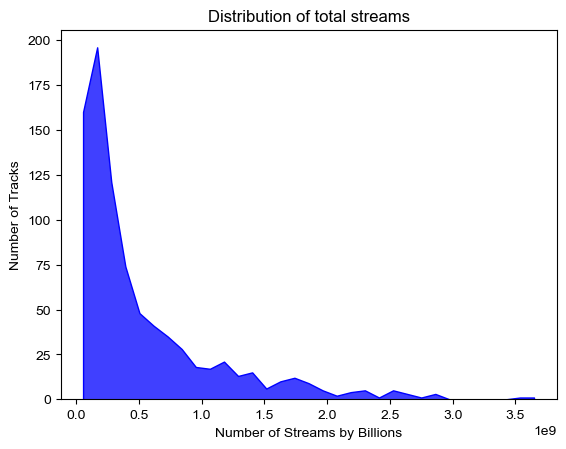

In [55]:
sns.histplot(df_spotify, x= 'streams',color='blue', element="poly").set(title = 'Distribution of total streams')
sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.xlabel('Number of Streams by Billions')
plt.ylabel('Number of Tracks')

##### It can be seen that the two of highest streamed song is both above 3.5 billion
##### The distribution of the number of streams also highlights that the outliers the dominate the calculation for the mean

#### Distribution of released_year and artist_count

Text(5.569444444444452, 0.5, 'Number of Tracks')

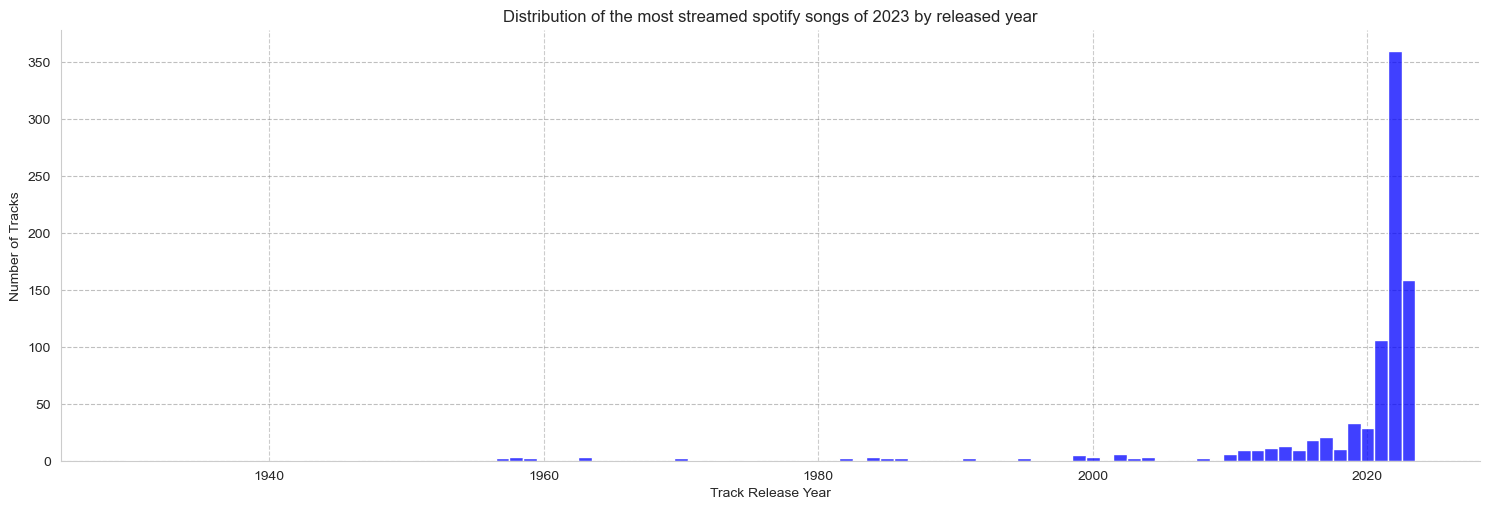

In [58]:
ryd = sns.displot(df_spotify, x='released_year',color='blue', discrete=True, aspect=3).set(title = "Distribution of the most streamed spotify songs of 2023 by released year")
# To plot the distrbution of the released_year along with its distribution line, and each year being represented
# also labels title

ax = ryd.ax
ax.grid(True, axis="y", color="gray", alpha=0.5)
# to place grids along the x_axis

plt.xlabel('Track Release Year')
plt.ylabel('Number of Tracks')
# labels x and y axes

##### It would seem the most streamed spotify songs of 2023 are mostly from the 2020's and largerly from the year 2022
##### This makes sense as trendy and topical music gets played over and over as they are newly released
##### Tracks from 2022 would also accumulate more plays at it had more time to earn it than the tracks that were released upon the year 2023
##### It would also seem that the distribution of the released year of the song follows recency bias, except for some goldies and some retro songs of the 2000's
#####
##### To check for outliers, we should calculate the interquartile range and count all the tracks outside of it
##### To also visualize the outliers, a box plot can be used 

In [60]:
Q1ry = df_spotify['released_year'].quantile(0.25) 
# Defines 1st quartile
Q3ry = df_spotify['released_year'].quantile(0.75)
# Defines 2nd quartile
IQRry = Q3ry - Q1ry

# Equation for finding outliers within a given data
outliers_ry = df_spotify[(df_spotify['released_year'] < Q1ry - 1.5 * IQRry) | (df_spotify['released_year'] > Q3ry + 1.5 * IQRry)]
ry_outliers_num = outliers_ry.shape[0]
f"There are about {ry_outliers_num} outliers within the release year attributes of the tracks."

'There are about 137 outliers within the release year attributes of the tracks.'

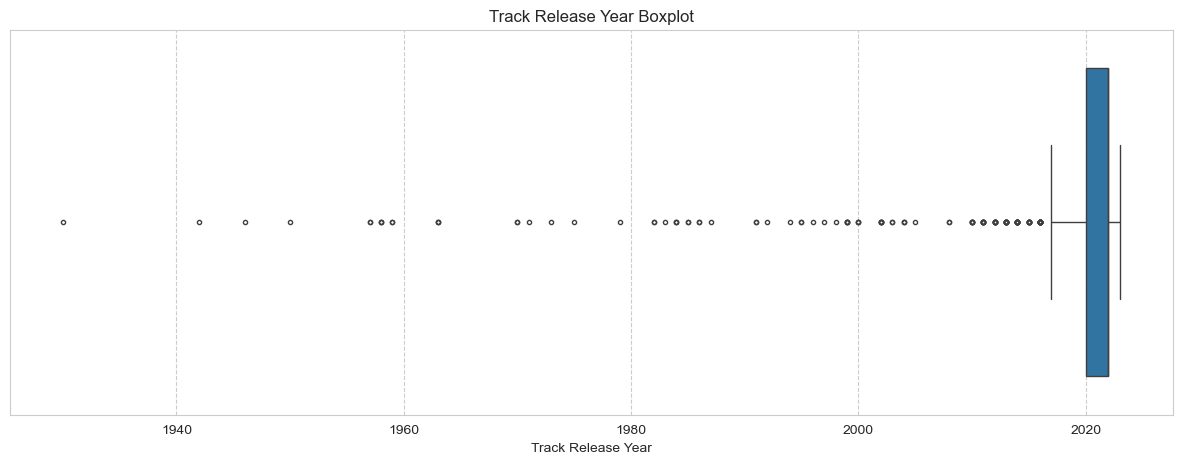

In [61]:
plt.figure(figsize=(15, 5))
# To size the boxplots

sns.boxplot(x=df_spotify['released_year'], fliersize=3)
# Creates boxplot and resize the outlier data points

plt.title("Track Release Year Boxplot") 
# Sets title for the boxplot
plt.xlabel("Track Release Year")
# Labels x-axis
plt.show()

Text(5.569444444444445, 0.5, 'Number of Tracks')

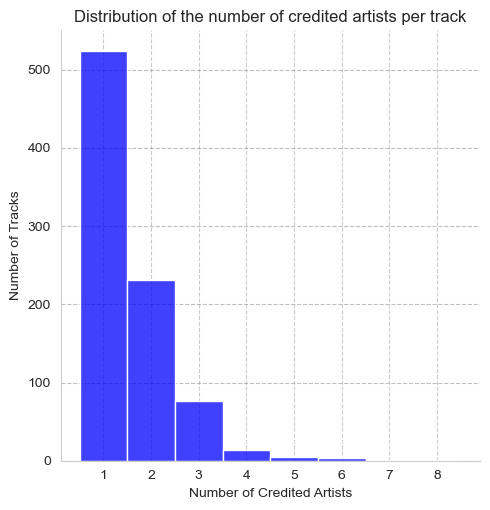

In [62]:
ac = sns.displot(df_spotify, x='artist_count', color='Blue', discrete=True).set(title = "Distribution of the number of credited artists per track")
# To plot the distrbution of the released_year along with its distribution line, and each year being represented
# To plot the distrbution of the released_year along with its distribution line, and each artist count being represented
# also labels title

sns.set_style("white")

ax = ac.ax
ax.grid(True, axis="y", color="gray", alpha=0.5)
# to place grids along the x_axis

plt.xlabel('Number of Credited Artists')
plt.ylabel('Number of Tracks')
# labels x and y axes

##### It would seem that the most streamed spotify songs of 2023 were made by a single artist 
##### The more artists are credited to a song, the less likely it would make the list of the most streamed spotify songs of 2023
#####
##### To also check for outliers, we should repeat the same process used before for the track release year

In [64]:
Q1ac = df_spotify['artist_count'].quantile(0.25)
Q3ac = df_spotify['artist_count'].quantile(0.75)
IQRac = Q3ac - Q1ac

# Equation for finding outliers within a given data
outliers_ac = df_spotify[(df_spotify['artist_count'] < Q1ac - 1.5 * IQRac) | (df_spotify['artist_count'] > Q3ac + 1.5 * IQRac)]
ac_outliers_num = outliers_ac.shape[0]
f"There are about {ac_outliers_num} outliers within the release year attributes of the tracks."

'There are about 24 outliers within the release year attributes of the tracks.'

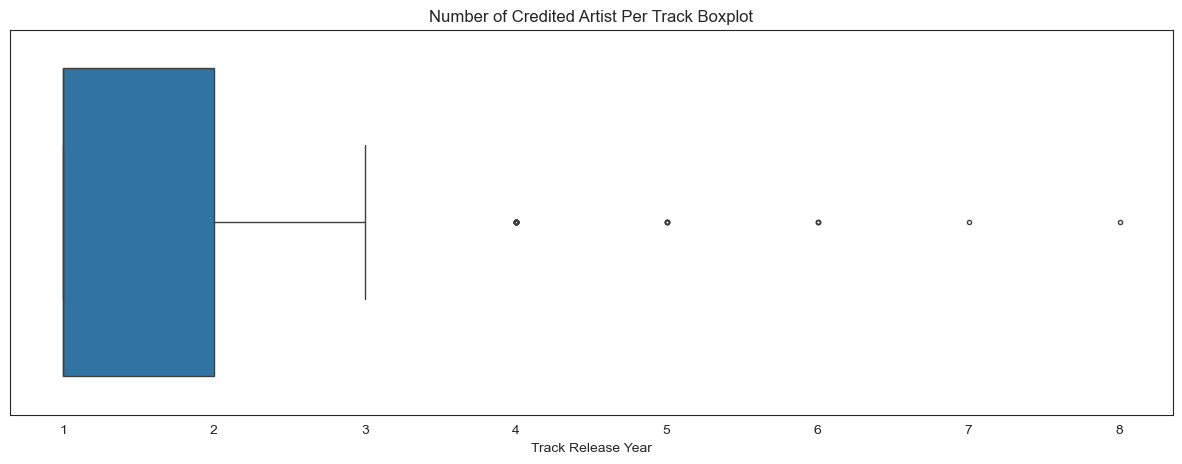

In [65]:
plt.figure(figsize=(15, 5))
# To size the boxplots

sns.boxplot(x=df_spotify['artist_count'], fliersize=3)
# Creates boxplot and resize the outlier data points

plt.title("Number of Credited Artist Per Track Boxplot") 
# Sets title for the boxplot
plt.xlabel("Track Release Year")
# Labels x-axis
plt.show()

---

### Top Performers

#### The top 5 most streamed tracks

In [69]:
df_spotify[['track_name', 'artist(s)_name','streams']].sort_values(by='streams', ascending=False).head()
# it sorts the data from greatest to least streams
# it locates and print the first 5 tracks along with its track name and the number of streams

,track_name,artist(s)_name,streams
49,Blinding Lights,The Weeknd,3.703895e+09
159,Shape of You,Ed Sheeran,3.562544e+09
78,Someone You Loved,Lewis Capaldi,2.887242e+09
553,Dance Monkey,Tones and I,2.864792e+09
37,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


##### The top 5 most streamed tracks are seen above, the most streamed track is the song 'Blinding Lights' by The Weeknd

##### To track the top artists, we must first seperate all the tracks that have multiple credited artists
##### This would make it so that each artist would have their own rows of the respective tracks
##### This is to adjust and accumulate all the streams for each artist

In [72]:
df_spotify['artist(s)_name'] = df_spotify['artist(s)_name'].str.split(',')
df_spotify['artist(s)_name']
# turns all the artists into a list and splits all of them with a column

0         [Latto,  Jung Kook]
1               [Myke Towers]
2            [Olivia Rodrigo]
3              [Taylor Swift]
4                 [Bad Bunny]
                ...          
850            [Selena Gomez]
851            [Taylor Swift]
852     [Feid,  Paulo Londra]
853    [Feid,  Sech,  Jhayco]
854               [Burna Boy]
Name: artist(s)_name, Length: 855, dtype: object

In [73]:
df_spotify = df_spotify.explode('artist(s)_name').reset_index(drop=True)
df_spotify['artist(s)_name'] = df_spotify['artist(s)_name'].str.strip()
df_spotify
# The .explode() makes it so that the list is counted as a row, we also reset index for cleaner analaysis
# The list of the seperated names in now stored in the column of the artist(s)_name
# The result can be seen below

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
1323,En La De Ella,Feid,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
1324,En La De Ella,Sech,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5
1325,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


##### The artist_count attribute is no longer valid as each artist is seperated, we should now drop that entire column for the rest of the EDA
##### To also have a cleaner data, we could now rewrite the attrbute of the artist(s)_name as just artist_name

In [75]:
df_spotify.drop('artist_count',axis=1,inplace=True)
# drops the artist_count attribute from the whole dataset
df_spotify.rename(columns={'artist(s)_name':'artist_name'}, inplace=True)
# renames the attribute of artist name properky

### Top 5 most frequent artists based on the number of tracks

In [77]:
df_spotify['artist_name'].value_counts().head()

artist_name
Bad Bunny         36
Taylor Swift      32
The Weeknd        28
Kendrick Lamar    23
Feid              21
Name: count, dtype: int64

##### The top 5 most frequent artists based on the number of tracks can be seen above
##### Taylor Swift being Top 2 makes sense as she releases different versions of the same songs
---

### Temporal Trends

#### Trends in number of track released over time

##### Releases over the years

Text(0.5, 1.0, 'Number of Tracks Released Per Month')

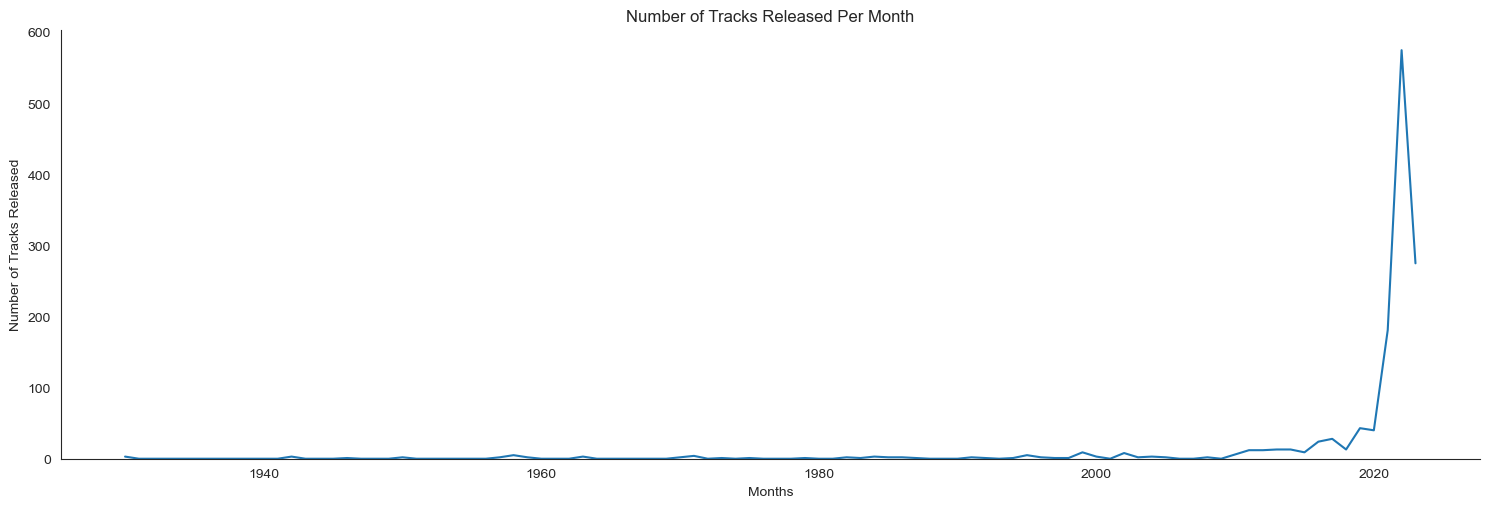

In [82]:
sns.displot(data=df_spotify, x='released_year', element='poly', fill=False, discrete=True, aspect = 3)
# plots the tracks released vs the year it was released

plt.xlabel('Months')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
# labels the different parts of the plot such as the x-axis, y-axis, and the title

##### Same observations as before, the most streamed songs follow recency bias, most of the tracks released in the 2020's
##### It also shows that given the right balance of time, tracks released from 2022 carry the most streams
##### due to given more time to rise in popularity

##### Releases over the months

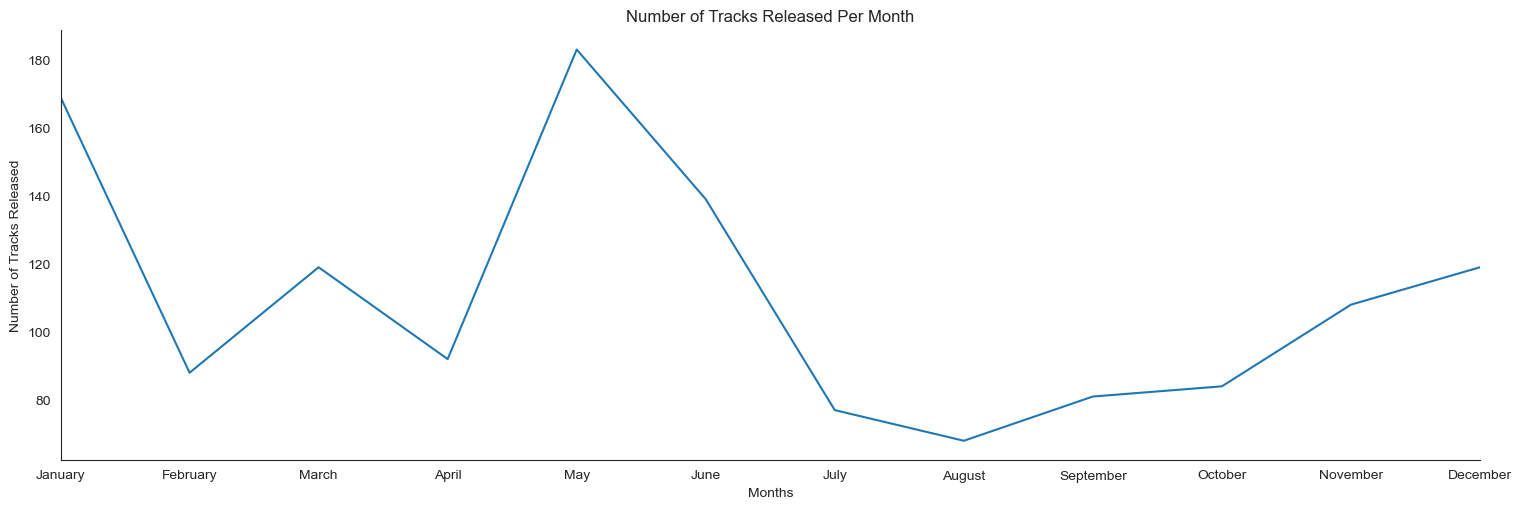

In [85]:
sns.displot(data=df_spotify, x='released_month', element='poly', fill=False, discrete=True, aspect = 3)
# plots the tracks released vs the months it was released on
sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.xlabel('Months')
plt.ylabel('Number of Tracks Released')
plt.title('Number of Tracks Released Per Month')
# labels the different parts of the plot such as the x-axis, y-axis, and the title


plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
# uses calendar library to name the months for the x-axis

plt.xlim(1, 12)
# shows all the months
plt.show()

##### The months that saw th most releases are both January and May, while August and September saw the least release
##### It would seem that the most streamed spotify songs of 2023 has no pattern in relation to their release month
#####
##### To further explore this, I decided to graph the same graph but only with the years between 2019 - 2023 including both boundaries for exactly 5 years

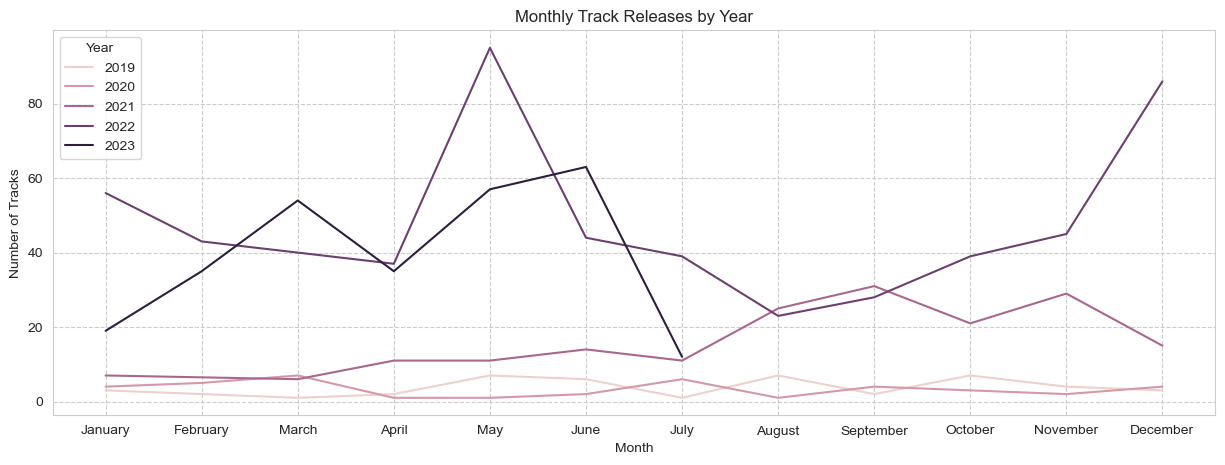

In [87]:
tracks_years_data = pd.DataFrame()
# Create a seperate dataframe for selected years

for year in range(2019, 2024):
    df_sub = df_spotify[df_spotify.released_year == year].groupby('released_month').size().reset_index(name='track_count')
    df_sub['year'] = year  # Add the year column
    tracks_years_data = pd.concat([tracks_years_data, df_sub], ignore_index=True)  # Concatenate to the seperate dataframe

# For loop for each year 2019-2020 to get the release month of all the tracks

plt.figure(figsize=(15, 5))
# Sets size of the plot

sns.lineplot(x='released_month', y='track_count', hue='year', data=tracks_years_data)
sns.set_style("whitegrid", {'grid.linestyle': '--'}) 
# Uses seaborn to plot the yearly data vs the track release month, and designs the grid


plt.title("Monthly Track Releases by Year")
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
# Labels the plots title, x-axis, and y-axis

plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
# x-labels as months using the calendar library

plt.legend(title="Year")
# Shows the legend for each line

plt.show()

##### As 2019 - 2023 years coincide most of the tracks from the data, it shows no pattern, hence the track release month being unpredictable

### Genre and Music Characteristics

#### Correlation streams and musical attributes

Text(0.5, 1.0, 'Heatmap of Streams & Different Music Attributes')

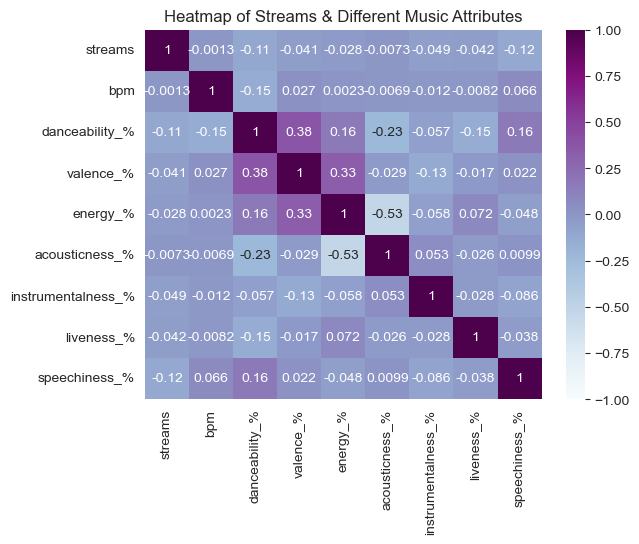

In [91]:
musical_attr = ['streams', 'bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
# Set up seperate data to only include streams and the track's musical attributes

df_musical_attr = df_spotify[musical_attr]
# Turn the seperate data into a dataframe

corr_music_attr = df_musical_attr.corr()
# calculates correlation between all the streams and musical attributes

sns.heatmap(corr_music_attr, annot=True, vmin = -1, vmax = 1, cmap='BuPu')
# creates heatmap to visualize all the correlations

plt.title("Heatmap of Streams & Different Music Attributes")

##### It would seem that all of the musical attributes has a very weak negative correlation as they all have values from -0.01 to -0.19
##### 
##### The musical attribute that has the least correlation to the number of streams is the bpm or beats per minute
#####
##### The strongest weak negative correlation is both danceability and speechiness being -0.11 and -0.12 respectively
##### The two seem to attributes seem to influence streams the most, although negatively
#####
##### The danceability and energy attributes has a very weak positive correlation, it is exactly at 0.16
#####
##### The valence and acousticness attributes has also a very weak positive correlation, it is exactly at -0.029
#####
##### The strongest weak positive correlation is between valence and danceability, which is at 0.38
##### The second strongest weak positive correlation is between valence and energy, which is at 0.33
---

### Platform Popularity

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3817674863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_spotify[track_platform_selected].sum(), palette='viridis')


Text(0, 0.5, 'Total Number of Occurences')

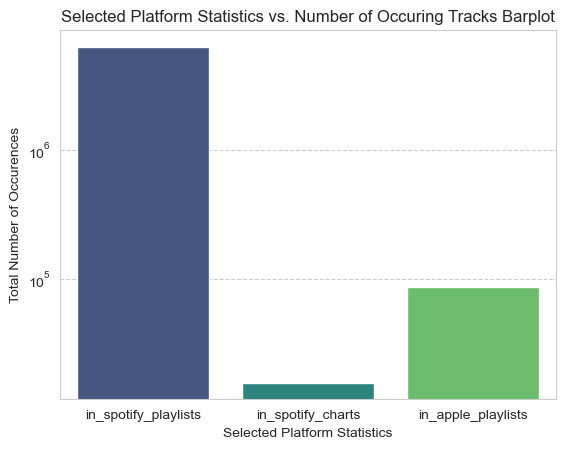

In [94]:
track_platform_selected = ['in_spotify_playlists','in_spotify_charts','in_apple_playlists']
# Select the specified platform statistics

sns.barplot(data=df_spotify[track_platform_selected].sum(), palette='viridis')
# Creates barplot with their respecive means and also colors it

plt.yscale('log')
# Scales the bar sizes

plt.title("Selected Platform Statistics vs. Number of Occuring Tracks Barplot")
plt.xlabel("Selected Platform Statistics")
plt.ylabel("Total Number of Occurences")
# Labels the plot's title, x-axis, and y-axis

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3816657768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_spotify[track_platform_selected].mean(), palette='viridis')


Text(0, 0.5, 'Mean Number of Occurences')

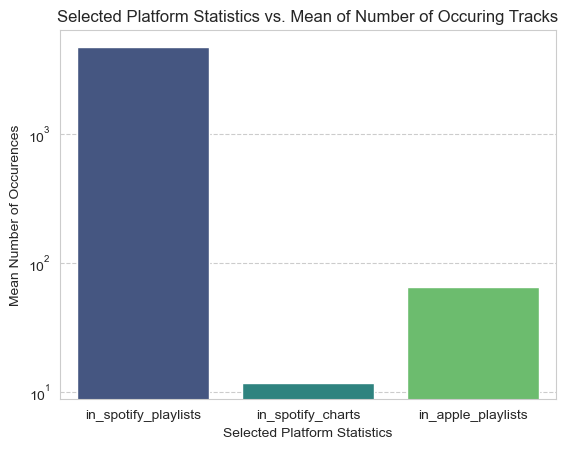

In [95]:
track_platform_selected = ['in_spotify_playlists','in_spotify_charts','in_apple_playlists']
# Select the specified platform statistics

sns.barplot(data=df_spotify[track_platform_selected].mean(), palette='viridis')
# Creates barplot with their respecive means and also colors it

plt.yscale('log')
# Scales the bar sizes

plt.title("Selected Platform Statistics vs. Mean of Number of Occuring Tracks")
plt.xlabel("Selected Platform Statistics")
plt.ylabel("Mean Number of Occurences")
# Labels the plot's title, x-axis, and y-axis

##### It would seem that the more the track is in spotify playlists, the more it is streamed
##### The spotify charts and apple playli does not seem to be an indicator of how much a track is streamed
#####
##### Spotify playlists being the indicator of the most streamed tracks makes sense as it is the more accessible, and customizable app for the masses
##### It is also not locked to any products and free to use unlike Apple music
#####
##### Let us dive deeper by comparing the different platform's statistics directly by their playlist counts and chart counts

#### Head-to-head platform chart statistics

#### Total charts head-to-head

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3778457463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_spotify[track_platform_charts].sum(), palette='viridis')


Text(0, 0.5, 'Number of Tracks')

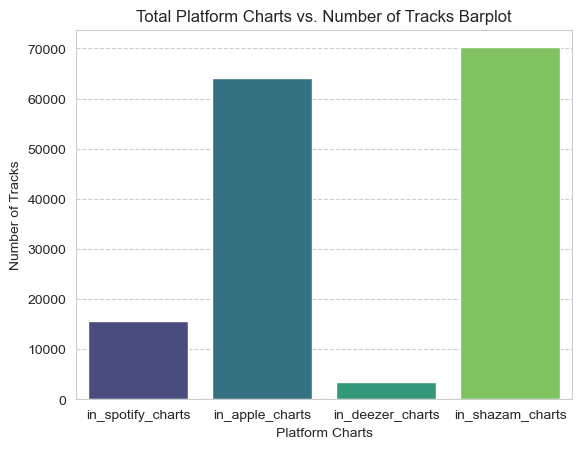

In [99]:
track_platform_charts = ['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']
# Seperate the chart attributes

sns.barplot(df_spotify[track_platform_charts].sum(), palette='viridis')
# Creates barplot with the means of all platform charts and also colors it

plt.title("Total Platform Charts vs. Number of Tracks Barplot")
plt.xlabel("Platform Charts")
plt.ylabel("Number of Tracks")
# Labels the plot's title, x-axis, and y-axis

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\1181070551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_spotify[track_platform_charts].mean(), palette='viridis')


Text(0, 0.5, 'Mean Number of Occurences')

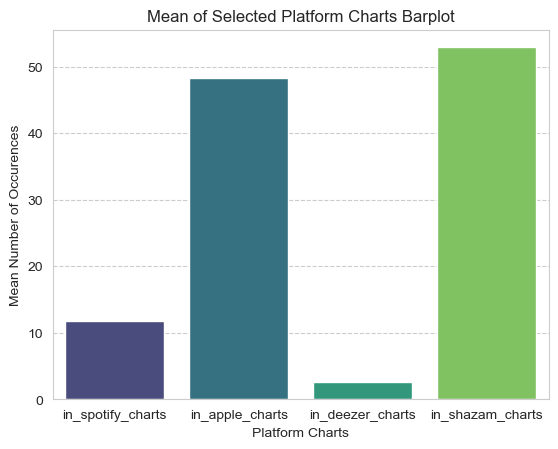

In [100]:
track_platform_charts = ['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']
# Seperate the chart attributes

sns.barplot(df_spotify[track_platform_charts].mean(), palette='viridis')
# Creates barplot with the means of all platform charts and also colors it

plt.title("Mean of Selected Platform Charts Barplot")
plt.xlabel("Platform Charts")
plt.ylabel("Mean Number of Occurences")
# Labels the plot's title, x-axis, and y-axis

##### The charts of Apple Music and Shazam seems to be more of an indicator of the most streamed songs of spotify in 2023 than 
##### the charts of Deezer and Spotify itself
#####

 #### Head-to-Head Number of tracks in platform playlists

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3124999937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_spotify[track_platform_playlists].sum(), palette='viridis')


Text(0, 0.5, 'Number of Occuring Tracks in Millions')

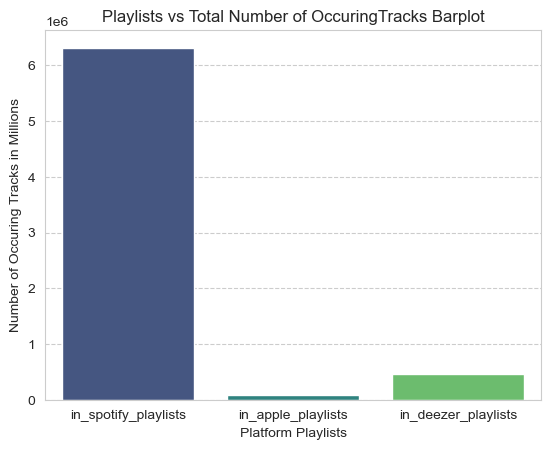

In [103]:
track_platform_playlists = ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']
# Seperate the chart attributes

sns.barplot(data=df_spotify[track_platform_playlists].sum(), palette='viridis')
# Creates barplot with the sum of all platform playlists and also colors it

plt.title("Playlists vs Total Number of OccuringTracks Barplot")
plt.xlabel("Platform Playlists")
plt.ylabel("Number of Occuring Tracks in Millions")
# Labels the plot's title, x-axis, and y-axis

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\1766178695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_spotify[track_platform_playlists].mean(), palette='viridis')


Text(0, 0.5, 'Mean Number of Occuring Tracks in Millions')

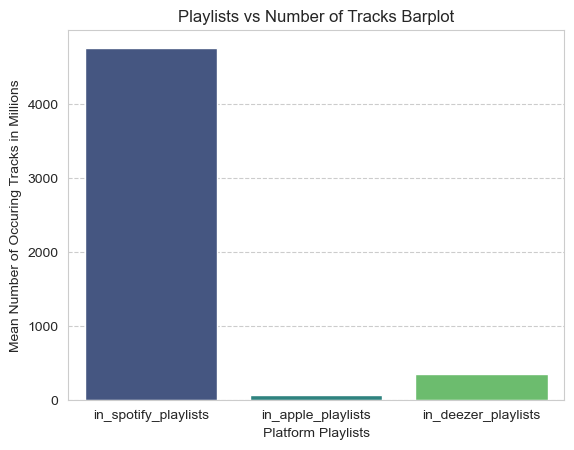

In [104]:
track_platform_playlists = ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']
# Seperate the chart attributes

sns.barplot(data=df_spotify[track_platform_playlists].mean(), palette='viridis')
# Creates barplot with the sum of all platform playlists and also colors it

plt.title("Playlists vs Number of Tracks Barplot")
plt.xlabel("Platform Playlists")
plt.ylabel("Mean Number of Occuring Tracks in Millions")
# Labels the plot's title, x-axis, and y-axis

##### It would seem like spotify playlist is still the biggest indicator of streams of tracks across other playlists of other platforms
---

### Advanced Analysis

#### Patterns among tracks with the same key 

##### Song counts per key

In [109]:
df_key_counts = pd.DataFrame(df_spotify.groupby("key").size())
# groups track by their key

df_key_counts = df_key_counts.sort_values(by='key').reset_index()
# sorts the key alphabetically and resets the index

df_key_counts = df_key_counts.rename(columns={0: 'number_of_tracks'})
# renames second column as number of tracks

df_key_counts

,key,number_of_tracks
0,A,121
1,A#,80
2,B,137
3,C#,195
4,D,118
5,D#,53
6,E,89
7,F,134
8,F#,111
9,G,155


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\331120050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_key_counts, x = 'key', y = 'number_of_tracks', palette='Set2')


Text(0, 0.5, 'Number of Tracks')

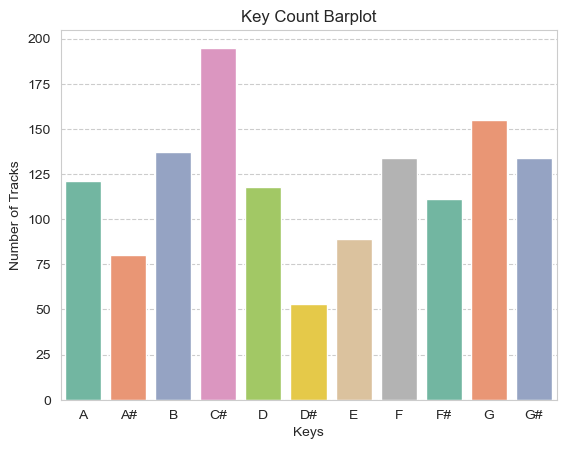

In [110]:
sns.barplot(df_key_counts, x = 'key', y = 'number_of_tracks', palette='Set2')
# Creates barplot of key counts and colors it


plt.title("Key Count Barplot")
plt.xlabel("Keys")
plt.ylabel("Number of Tracks")
# Labels the plot's title, x-title, y-title

##### The most prevalent key is C Sharp at 195 songs, followed by G at 155 songs, followed closely by both F and G Sharp both at 134 songs


#### Key vs. Streams

In [113]:
df_key_streams = df_spotify[['key', 'streams']].groupby('key').sum('streams')
# Creates a dataframe of key with it's corresponding number of streams

df_key_streams = df_key_streams.sort_values(by='key').reset_index()
# Sorts key values and resets the indexing

df_key_streams

,key,streams
0,A,4.372995e+10
1,A#,3.653751e+10
2,B,6.220810e+10
3,C#,1.069682e+11
4,D,6.702652e+10
5,D#,2.569181e+10
6,E,4.927727e+10
7,F,5.562887e+10
8,F#,5.318381e+10
9,G,6.650793e+10


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\442523224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_key_streams, x = 'key', y = 'streams', palette='Set2')


Text(0, 0.5, 'Streams by One Hundred Billion')

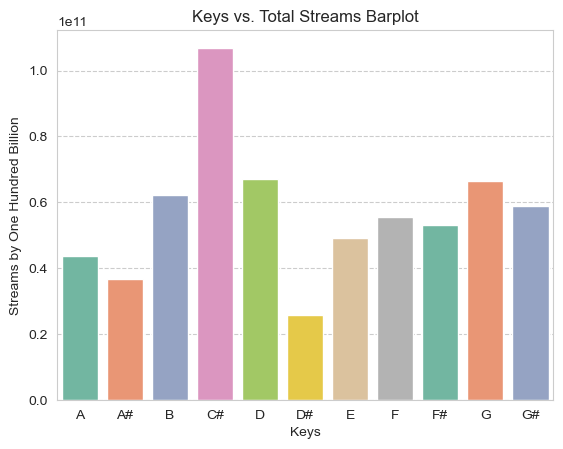

In [114]:
sns.barplot(df_key_streams, x = 'key', y = 'streams', palette='Set2')
# Creates barplot with keys vs. total streams

plt.title("Keys vs. Total Streams Barplot")
plt.xlabel("Keys")
plt.ylabel("Streams by One Hundred Billion")
# Labels title, x-title, and y-title

##### With C Sharp, it makes sense that it also has the most total streams
##### Followed by D and G, tied at 2nd place
##### Closely followed by B, placing at 3rd
#####
##### It seems as if the total streams follow the pattern of the number of tracks per key.
#####
##### For extra analysis, we can check the mean of each stream of each key 

In [116]:
df_key_streams['mean_streams'] = df_key_streams['streams']/df_key_counts['number_of_tracks']
# adds the mean of streams to the same dataframe

df_key_streams

,key,streams,mean_streams
0,A,4.372995e+10,3.614046e+08
1,A#,3.653751e+10,4.567189e+08
2,B,6.220810e+10,4.540737e+08
3,C#,1.069682e+11,5.485548e+08
4,D,6.702652e+10,5.680214e+08
5,D#,2.569181e+10,4.847512e+08
6,E,4.927727e+10,5.536772e+08
7,F,5.562887e+10,4.151408e+08
8,F#,5.318381e+10,4.791334e+08
9,G,6.650793e+10,4.290834e+08


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\445346913.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_key_streams, x = 'key', y = 'mean_streams', palette = 'Set2')


Text(0, 0.5, 'Stream Mean by Hundred Millions')

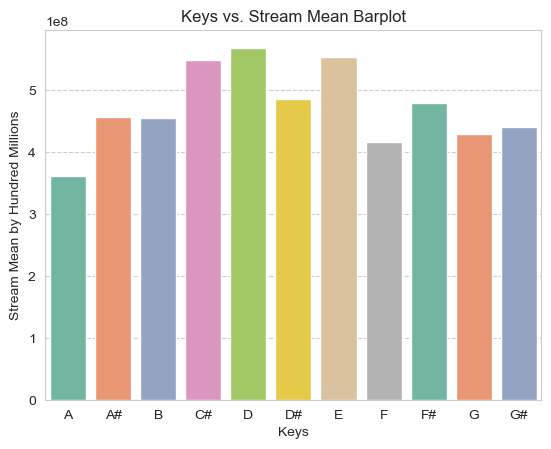

In [117]:
sns.barplot(df_key_streams, x = 'key', y = 'mean_streams', palette = 'Set2')

plt.title("Keys vs. Stream Mean Barplot")
plt.xlabel("Keys")
plt.ylabel("Stream Mean by Hundred Millions")
# Labels the plot's title, x-title, and y-title

##### It would seem that the averages of the keys changes the hierarchy of the placements
#####
##### The top 3 keys when comparing to the means of their streams are as follows
##### Top 1 is D at about 5.6 hundred million streams
##### Top 2 is E at about just 5.53 hundred million streams
##### Lastly, Top 3 is C Sharp at about just 5.48 hundred million streams
#####

### Mode vs. Streams

#### Total Tracks per Mode

In [121]:
df_mode_counts = pd.DataFrame(df_spotify.groupby("mode").size())
# groups track by their key

df_mode_counts = df_mode_counts.sort_values(by='mode').reset_index()
# sorts the key alphabetically and resets the index

df_mode_counts = df_mode_counts.rename(columns={0: 'number_of_tracks'})
# renames second column as number of tracks

df_mode_counts

,mode,number_of_tracks
0,Major,695
1,Minor,632


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\3472527761.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_mode_counts, x = 'mode', y = 'number_of_tracks', palette='Set2')


Text(0, 0.5, 'Number of Tracks')

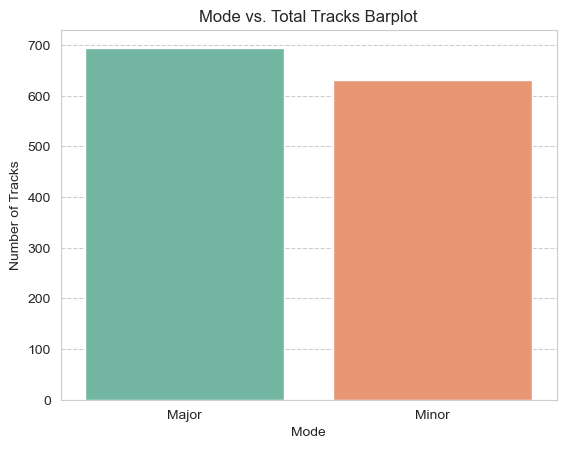

In [122]:
sns.barplot(df_mode_counts, x = 'mode', y = 'number_of_tracks', palette='Set2')
# Creates mode vs. number of tracks barplot and colors it

plt.title("Mode vs. Total Tracks Barplot")
plt.xlabel("Mode")
plt.ylabel("Number of Tracks")
# Labels the plot's title, x-title, and y-title

##### There is about 60 more tracks in Major than in Minor mode, therefore it may correlate to more streams in the Major Mode

#### Mode vs. Total Streams

In [125]:
df_mode_stream = df_spotify[['mode', 'streams']].groupby('mode').sum('streams')
# creates a seperate dataframe where in the total streams are grouped by mode

df_mode_stream = df_mode_stream.sort_values(by='streams', ascending=False).reset_index()
# sorts the stream value by greatest to least

df_mode_stream

,mode,streams
0,Major,3.557760e+11
1,Minor,2.699852e+11


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\1396043133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_mode_stream, x = 'mode', y = 'streams', palette = 'Set2')


Text(0, 0.5, 'Streams by Hundred Billions')

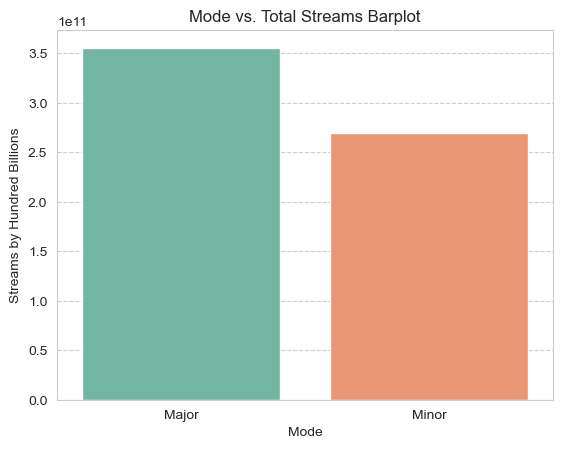

In [126]:
sns.barplot(df_mode_stream, x = 'mode', y = 'streams', palette = 'Set2')

plt.title("Mode vs. Total Streams Barplot")
plt.xlabel("Mode")
plt.ylabel("Streams by Hundred Billions")
# Labels the plot's title, x-title, and y-title

##### The Major mode has almost 1 hundred billion more streams than the minor mode, this is also due to the fact that
##### more tracks are made in the major mode

### Mode vs. Stream Mean

In [129]:
df_mode_stream['mean_streams'] = df_mode_stream.streams / df_mode_counts.number_of_tracks

df_mode_stream

,mode,streams,mean_streams
0,Major,3.557760e+11,5.119079e+08
1,Minor,2.699852e+11,4.271918e+08


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\269446701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_mode_stream, x = 'mode', y = 'mean_streams', palette = 'Set2')


Text(0, 0.5, 'Stream Mean by Hundred Millions')

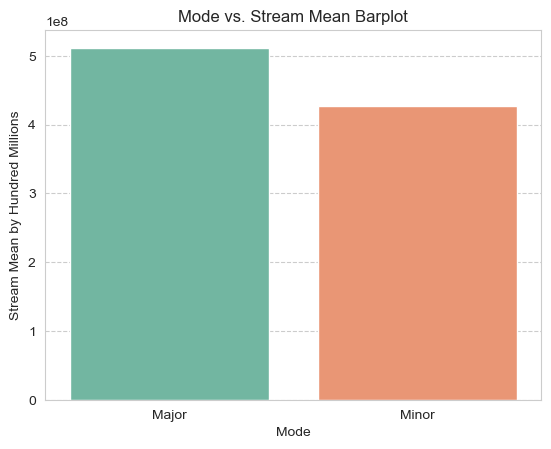

In [130]:
sns.barplot(df_mode_stream, x = 'mode', y = 'mean_streams', palette = 'Set2')
# Creates mode vs. mean of streams barplot and colors it

plt.title("Mode vs. Stream Mean Barplot")
plt.xlabel("Mode")
plt.ylabel("Stream Mean by Hundred Millions")
# Labels the plot's title, x-title, and y-title

##### It seems that on average more people streams songs that is in Major Mode than in Minor
##### Major mode songs are streamed 100 million more by average
#####

### Most Frequent Artists in Playlists and Charts

#### For most frequent artists in playlists

In [134]:
platform_playlists = ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']
# groups all playlists attribute

df_artist_playlists = df_spotify.groupby('artist_name').sum(platform_playlists)
# groups by artists and adds all their occurances in the different platform pllaylists

df_artist_playlists = df_artist_playlists.sort_values(platform_playlists, ascending=False).reset_index()
# orders occurances in the diff platform playlists from greatest to least

df_artist_playlists[['artist_name','in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].head()

,artist_name,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
0,The Weeknd,159733,2028,8642.0
1,Eminem,155091,740,24524.0
2,Ed Sheeran,139238,1739,17658.0
3,Bad Bunny,129528,1949,2780.0
4,Dua Lipa,119490,2118,7902.0


C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\2282785777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_artist_playlists.head().sort_values('in_spotify_playlists'), x = 'artist_name', y = 'in_spotify_playlists', palette='Set2', ax=axes[0])
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\2282785777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_artist_playlists.head().sort_values('in_apple_playlists'), x = 'artist_name', y = 'in_apple_playlists', palette='Set2', ax=axes[1]).set(title='Artist vs. Occurance in Apple Music Playlists Barplot')
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\2282785777.py:23: FutureWarning: 

Passing `palette` wit

Text(0, 0.5, 'Number of Occurance in Deezer Playlists')

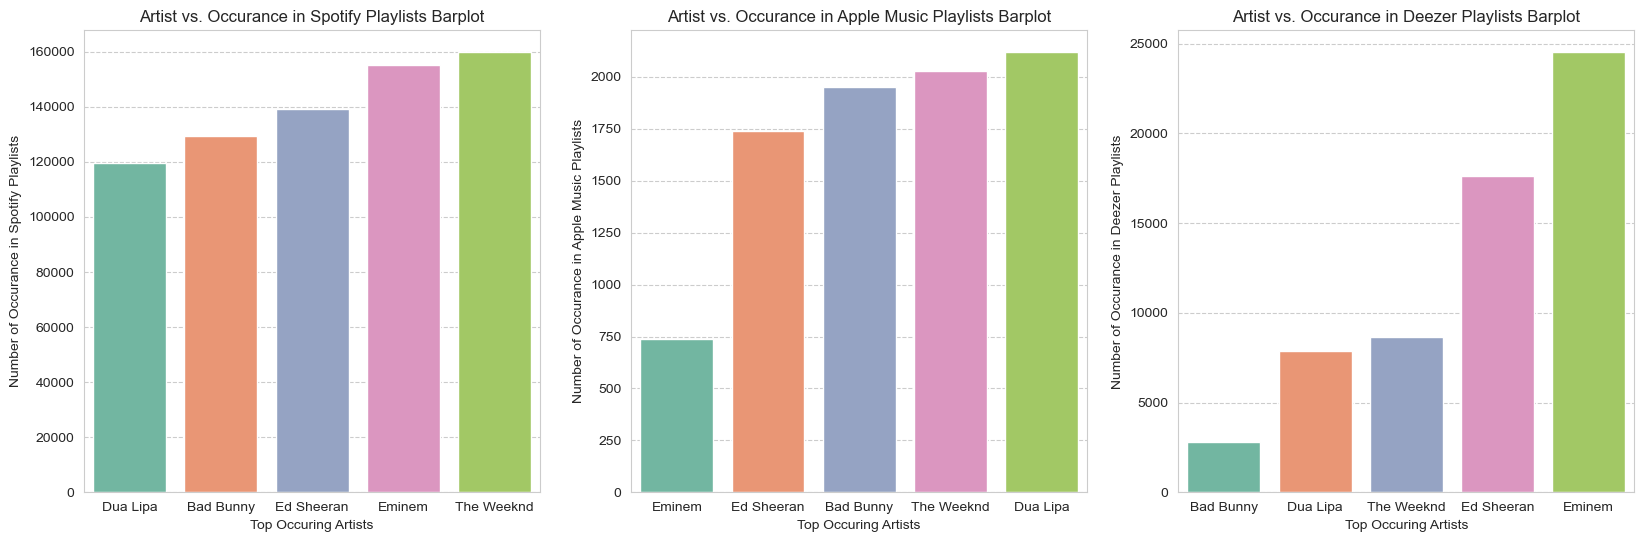

In [162]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 6))
# Sets to plot 3 graphs at once

sns.barplot(df_artist_playlists.head().sort_values('in_spotify_playlists'), x = 'artist_name', y = 'in_spotify_playlists', palette='Set2', ax=axes[0])
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[0].set(title='Artist vs. Occurance in Spotify Playlists Barplot')
axes[0].set_xlabel('Top Occuring Artists')
axes[0].set_ylabel("Number of Occurance in Spotify Playlists")
# Labels the plot's title, x-title, and y-title

sns.barplot(df_artist_playlists.head().sort_values('in_apple_playlists'), x = 'artist_name', y = 'in_apple_playlists', palette='Set2', ax=axes[1]).set(title='Artist vs. Occurance in Apple Music Playlists Barplot')
# plots the artist count vs. occurence in Apple Music playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[1].set(title='Artist vs. Occurance in Apple Music Playlists Barplot')
axes[1].set_xlabel('Top Occuring Artists')
axes[1].set_ylabel("Number of Occurance in Apple Music Playlists")
# Labels the plot's title, x-title, and y-title

sns.barplot(df_artist_playlists.head().sort_values('in_deezer_playlists'), x = 'artist_name', y = 'in_deezer_playlists', palette='Set2', ax=axes[2]).set(title='Artist vs. Occurance in Deezer Playlists Barplot')
# plots the artist count vs. occurence in deezer playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[2].set(title='Artist vs. Occurance in Deezer Playlists Barplot')
axes[2].set_xlabel('Top Occuring Artists')
axes[2].set_ylabel("Number of Occurance in Deezer Playlists")
# Labels the plot's title, x-title, and y-title

##### The most consistent artists in the different platform playlist are:
##### The Weeknd: Top 1 in Spotify, Top 2 in Apple Music, and Top 3 in Deezer
##### Eminem: Top 2 in Spotify, Top 5 in Apple Music, and Top 1 in Deezer
##### Ed Sheeran: Top 2 in Spotify, Top 4 in Apple Music, Top 2 in Deezer
#####

#### For most frequent artists in different platform charts

In [146]:
platform_charts = ['in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']

df_artist_charts = df_spotify.groupby('artist_name').sum(platform_charts)
# groups by artists and adds all their occurances in the different platform pllaylists

df_artist_charts = df_artist_charts.sort_values(platform_charts, ascending=False).reset_index()
# orders occurances in the diff platform playlists from greatest to least

df_artist_charts[['artist_name','in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']].head()

,artist_name,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,Bad Bunny,658,2226,159,1306.0
1,The Weeknd,513,1797,62,1995.0
2,Taylor Swift,506,1745,53,1603.0
3,Feid,445,809,91,758.0
4,Peso Pluma,299,1570,68,1278.0


In [ ]:
sns.barplot(df_artist_charts.head().sort_values('in_spotify_charts'), x = 'artist_name', y = 'in_spotify_charts', palette='Set2', ax=axes[0]).set(title='Artist vs. Occurance in Spotify Charts Barplot')

C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\825746661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_artist_charts.head().sort_values('in_spotify_charts'), x = 'artist_name', y = 'in_spotify_charts', palette='Set2', ax=axes[0,0])
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\825746661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_artist_charts.head().sort_values('in_apple_charts'), x = 'artist_name', y = 'in_apple_charts', palette='Set2', ax=axes[0,1])
C:\Users\Angelo Bon-ao\AppData\Local\Temp\ipykernel_16036\825746661.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

Text(0, 0.5, 'Number of Occurance in Shazam Charts')

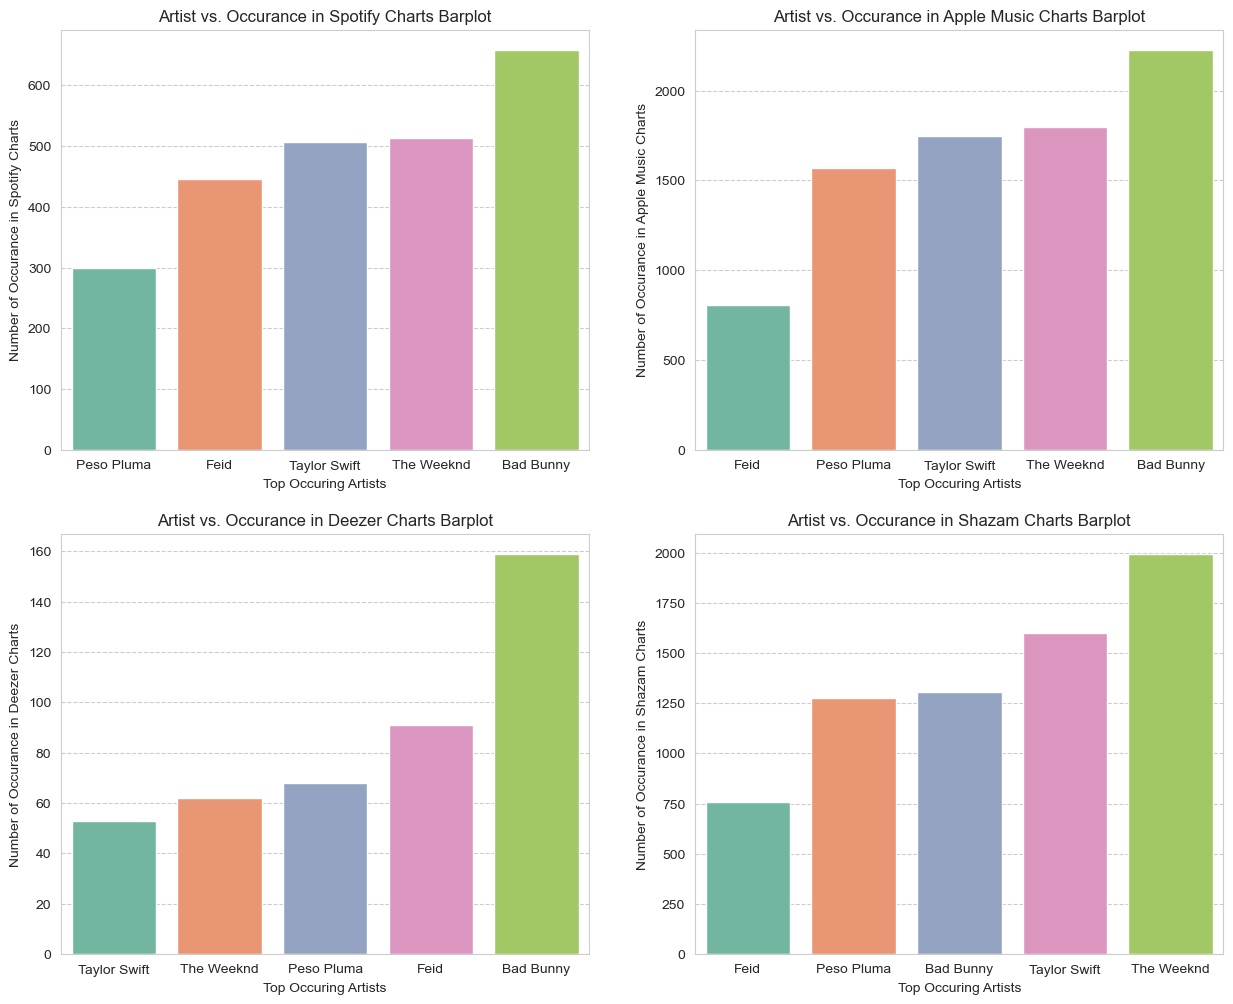

In [166]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
# Sets to plot 4 graphs at once

sns.barplot(df_artist_charts.head().sort_values('in_spotify_charts'), x = 'artist_name', y = 'in_spotify_charts', palette='Set2', ax=axes[0,0])
# plots the artist count vs. occurence in Spotify playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[0,0].set(title='Artist vs. Occurance in Spotify Charts Barplot')
axes[0,0].set_xlabel('Top Occuring Artists')
axes[0,0].set_ylabel("Number of Occurance in Spotify Charts")
# Labels the plot's x-title and y-title

sns.barplot(df_artist_charts.head().sort_values('in_apple_charts'), x = 'artist_name', y = 'in_apple_charts', palette='Set2', ax=axes[0,1])
# plots the artist count vs. occurence in Apple Music playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[0,1].set(title='Artist vs. Occurance in Apple Music Charts Barplot')
axes[0,1].set_xlabel('Top Occuring Artists')
axes[0,1].set_ylabel("Number of Occurance in Apple Music Charts")
# Labels the plot's x-title and y-title

sns.barplot(df_artist_charts.head().sort_values('in_deezer_charts'), x = 'artist_name', y = 'in_deezer_charts', palette='Set2', ax=axes[1,0])
# plots the artist count vs. occurence in deezer playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[1,0].set(title='Artist vs. Occurance in Deezer Charts Barplot')
axes[1,0].set_xlabel('Top Occuring Artists')
axes[1,0].set_ylabel("Number of Occurance in Deezer Charts")
# Labels the plot's x-title and y-title

sns.barplot(df_artist_charts.head().sort_values('in_shazam_charts'), x = 'artist_name', y = 'in_shazam_charts', palette='Set2', ax=axes[1,1])
# plots the artist count vs. occurence in deezer playlists barplot and colors it
# also orders from greatest to least and only plots the top 5 artists
# also sets the title for the plot

axes[1,1].set(title='Artist vs. Occurance in Shazam Charts Barplot')
axes[1,1].set_xlabel('Top Occuring Artists')
axes[1,1].set_ylabel("Number of Occurance in Shazam Charts")
# Labels the plot's x-title and y-title

##### The top artists that are consistently in charts of different platforms are:
##### Bad Bunny: Top 1 in Spotify, Top 1 in Apple Music, Top 1 in Deezer, and Top 3 in Shazam
##### The Weeknd: Top 2 in Spotify, Top 2 in Apple Music, Top 4 in Deezer, and Top 1 in Shazam
##### Taylor Swift: Top 3 in Spotify, Top 3 in Apple Music, Top 5 in Deezer, and Top 2 in Shazam
#####
##### It seems like artists consistently appear more in playlists than in charts as all the top 5 artists in playlists are the same throughout the platforms